In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
import matplotlib.animation as animation
import math
import random

plt.style.use('ggplot') # use "ggplot" style for graphs
random.seed()

In [9]:
# Function which generates state mu
def mu(a, r_2):
    sums = np.cumsum(a)
    a_0 = np.sum(a)
    
    # Find which value of mu is chosen
    for i in range(0, len(sums)):
        # The first value found will be the smallest one due to the nature of cumsum
        if sums[i] > r_2 * a_0:
            return i

# Function which returns correct values for u and v change depending on mu        
def mu_change(argument):
    switcher = {
        0: (1, 0, 0),
        1: (-1, 0, 0),
        2: (0, 1, 0),
        3: (0, -1, 0),
        4: (0, 0, 1),
        5: (0, 0, -1),
    }
    return switcher.get(argument,"Invalid value of mu")

In [10]:
# Set parameters
num = 1000 # number of particles
steps = 10000 # number of steps

t = np.arange(steps)
x = np.zeros((num,steps))
y = np.zeros((num,steps))
z = np.zeros((num,steps))

a = np.zeros(6)

# Find processes

# Step forward in x
a[0] = 1
# Step backward in x
a[1] = 1
# Step forward in y
a[2] = 1
# Step backward in y
a[3] = 1
# Step forward in y
a[4] = 1
# Step backward in y
a[5] = 1
    
a_0 = np.sum(a)

# Official Gillespie loop
for j in range(num):
    for i in range(1,steps):
            
        r_2 = random.uniform(0,1)

        mu_temp = mu(a, r_2)
        
        factors = mu_change(mu_temp)
        
        if j == 0:
            t[i] = i
        x[j][i] = x[j][i-1] + factors[0]
        y[j][i] = y[j][i-1] + factors[1]
        z[j][i] = z[j][i-1] + factors[2]
        
        i += 1

In [11]:
mu_vec = np.vectorize(mu_change)

psteps = np.random.choice(6, (num,steps))
psteps = mu_vec(psteps)

psteps[0][:,0] = 0
psteps[1][:,0] = 0
psteps[2][:,0] = 0

x = np.cumsum(psteps[0], axis = 1)
y = np.cumsum(psteps[1], axis = 1)
z = np.cumsum(psteps[2], axis = 1)

"""step_array = [-1,0,1]
x_steps = np.random.choice(step_array, (num,steps))
x_steps[:,0] = 0
y_steps = np.random.choice(step_array, (num,steps))
y_steps[:,0] = 0
z_steps = np.random.choice(step_array, (num,steps))
z_steps[:,0] = 0

x = np.cumsum(x_steps, axis = 1)
y = np.cumsum(y_steps, axis = 1)
z = np.cumsum(z_steps, axis = 1)"""

'step_array = [-1,0,1]\nx_steps = np.random.choice(step_array, (num,steps))\nx_steps[:,0] = 0\ny_steps = np.random.choice(step_array, (num,steps))\ny_steps[:,0] = 0\nz_steps = np.random.choice(step_array, (num,steps))\nz_steps[:,0] = 0\n\nx = np.cumsum(x_steps, axis = 1)\ny = np.cumsum(y_steps, axis = 1)\nz = np.cumsum(z_steps, axis = 1)'

D = 0.17217999212666668 (Simulation via MSD)
Fitted D = 0.17106555182257757 in cm^2 min^-1


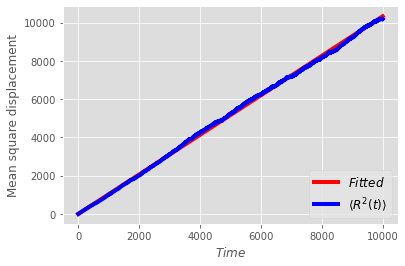

In [12]:
# Mean square displacement vs time
msd = np.zeros([steps])

Rs = np.array([x,y,z])

for i in range(steps): # loop over time steps
    linalg =  np.linalg.norm(Rs[:,:,i], axis=0)**2
    algsum = np.sum(linalg)
    msd[i] = msd[i] + algsum # (R(t) - R(0))^2 = R(t)^2, since R(0)
    msd[i] = msd[i]/num # average over particles
    
dmsd = np.trapz(msd, dx=1)/ (3*(steps*1)**2) # integrate using trapezoidal rule
print('D =',dmsd,'(Simulation via MSD)')

fit = np.polyfit(t, msd, 1)
print('Fitted D =',fit[0]/6,'in cm^2 min^-1')
d1 = fit[0]/6

predict = np.poly1d(fit)
theory = predict(t)

dmsdfit = 6*dmsd*t
    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_xlabel(r"$Time$",fontsize=12)
ax.set_ylabel(r"Mean square displacement",fontsize=12)
#ax.plot(t,theory,'g',lw=4, label=r'$Fitted$')
ax.plot(t,dmsdfit,'r',lw=4, label=r'$Fitted$')
ax.plot(t, msd,'b',lw=4, label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=12,loc=4)
plt.savefig('Figures/randwalk 3D msd.pdf', bbox_inches='tight')
plt.show()

<ipython-input-13-580f4d5bca68>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = dmsdfit/(theory-fit[1])


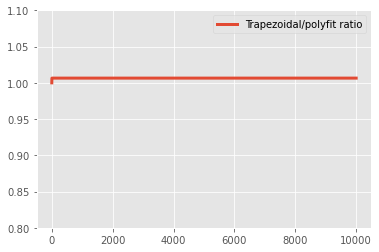

In [13]:
ratio = dmsdfit/(theory-fit[1])
ratio[0] = 1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,ratio,lw=3,label='Trapezoidal/polyfit ratio') # plot y/ya vs. t
ax.set_ylim(ymin=0.8, ymax= 1.1)
ax.legend() #display legends
plt.show() #display plots

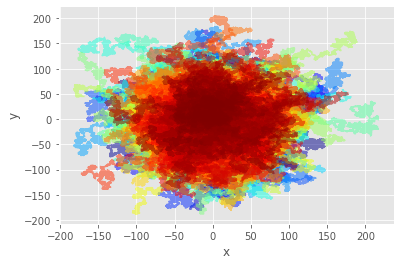

In [14]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,num)))

fig = plt.figure()
ax = fig.add_subplot(111)
for j in range(num):
    ax.plot(x[j], y[j], color=next(colors), alpha=0.5)
ax.set_xlabel('x',fontsize=12)
ax.set_ylabel('y',fontsize=12)
plt.savefig('Figures/randwalk 3D xy visual.pdf', bbox_inches='tight')
plt.show()

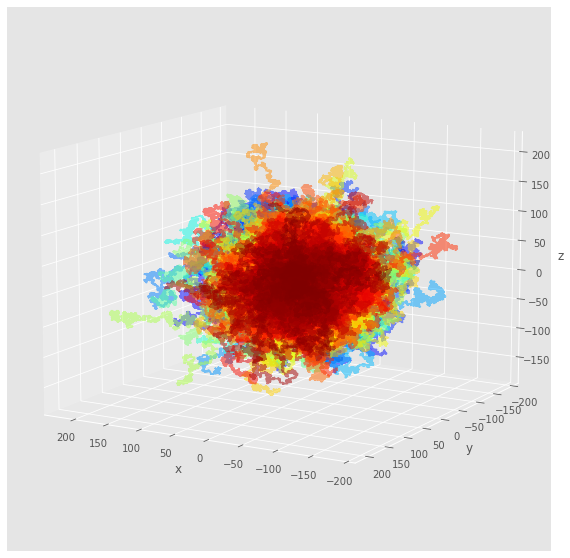

In [15]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,num)))

box=80. # set draw area as box^3
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 
ax.set_xlabel(r"x",fontsize=12) # set x-label
ax.set_ylabel(r"y",fontsize=12) # set y-label
ax.set_zlabel(r"z",fontsize=12) # set z-label
ax.view_init(elev=12,azim=120) # set view point
for n in range(num): # repeat from n=0 to nump-1
    ax.plot(Rs[0,n,:],Rs[1,n,:],Rs[2,n,:],alpha=0.5, color=next(colors)) # plot trajectiries of all particle
plt.savefig('Figures/randwalk 3D visual.pdf', bbox_inches='tight')
plt.show() # draw plots

In [ ]:
#jet= plt.get_cmap('jet')
#colors = iter(jet(np.linspace(0,1,num)))

# Create a figure and a 3D Axes
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 
ax.set_xlabel(r"x",fontsize=12) # set x-label
ax.set_ylabel(r"y",fontsize=12) # set y-label
ax.set_zlabel(r"z",fontsize=12) # set z-label

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    for n in range(num): # repeat from n=0 to nump-1
        ax.plot(Rs[0,n,:],Rs[1,n,:],Rs[2,n,:],alpha=0.5) # plot trajectiries of all particle
    return fig,

def animate(i):
    ax.view_init(elev=12., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save(r'Figures/random walk 3D rotation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
# ANIMATION FUNCTION
def func(n, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :n])    
    line.set_3d_properties(dataSet[2, :n])    
    return line

# THE DATA POINTS
dataSet = np.array([Rs[0,0,:], Rs[1,0,:], Rs[2,0,:]])
numDataPoints = len(Rs[0,0,:])
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], alpha=0.5, lw=2, c='b')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
#ax.set_xlim3d(0,nx) # set x-range
#ax.set_ylim3d(0,ny) # set y-range
#ax.set_zlim3d(0,nz) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=5, blit=False)
line_ani.save(r'Figures/random walk 3D single.mp4')
 
 
plt.show() # draw plots

In [ ]:
# ANIMATION FUNCTION
def func(n, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :n])    
    line.set_3d_properties(dataSet[2, :n])    
    return line

# THE DATA POINTS
dataSet = np.array([Rs[0,-1,:], Rs[1,-1,:], Rs[2,-1,:]])
numDataPoints = len(Rs[0,0,:])
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], alpha=0.5, lw=2, c='r')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
#ax.set_xlim3d(0,nx) # set x-range
#ax.set_ylim3d(0,ny) # set y-range
#ax.set_zlim3d(0,nz) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=5, blit=False)
line_ani.save(r'Figures/random walk 3D single 2.mp4')

 
plt.show() # draw plots

0
58.6792593899163


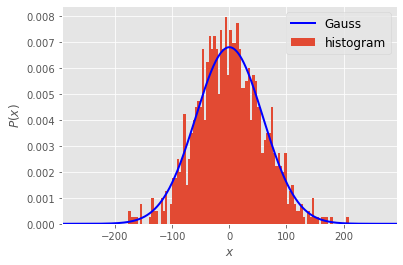

In [16]:
ave = 0 # Average position i.e. starting position
std = np.sqrt(2*dmsd*t[-1]) # Standard deviation i.e. sqrt(2Dt)

nmin=int(ave-std*5)
nmax=int(ave+std*5)
nbin=int((nmax-nmin)/4)

fig = plt.figure()
ax = fig.add_subplot(111)

print(ave)
print(std)

ax.hist(Rs[0,:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'x-axis particle distribution')
ax.set_xlabel(r'$x$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(x)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/randwalk 3D x distr.pdf', bbox_inches='tight')
plt.show() # display plots

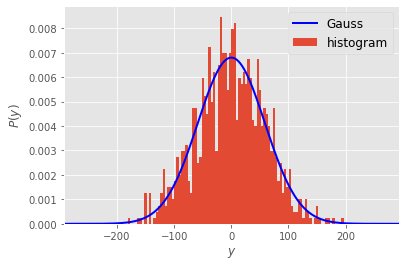

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(Rs[1,:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'y-axis particle distribution')
ax.set_xlabel(r'$y$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(y)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/randwalk 3D y distr.pdf', bbox_inches='tight')
plt.show() # display plots

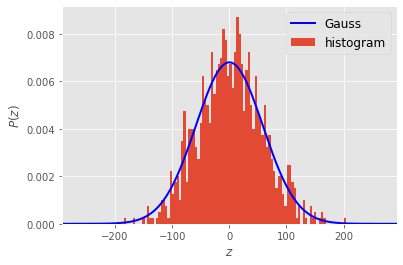

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(Rs[2,:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'z-axis particle distribution')
ax.set_xlabel(r'$z$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(z)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/randwalk 3D z distr.pdf', bbox_inches='tight')
plt.show() # display plots

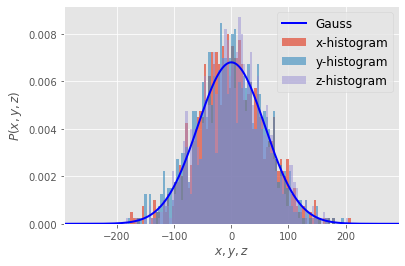

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(Rs[0,:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True, alpha=0.7,label=r'x-histogram') # plot normalized histogram of L
ax.hist(Rs[1,:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True, alpha=0.6,label=r'y-histogram') # plot normalized histogram of L
ax.hist(Rs[2,:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True, alpha=0.5,label=r'z-histogram') # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b',label=r'Gauss') # plot y vs. x with blue line
#ax.set_title(r'y-axis particle distribution')
ax.set_xlabel(r'$x,y,z$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(x,y,z)$',fontsize=12) # set y-label
ax.legend(fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/randwalk 3D xyz distr.pdf', bbox_inches='tight')
plt.show() # display plots